<a href="https://colab.research.google.com/github/jcmachicao/modpred_2/blob/main/NN__funcion_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#redes neuronales

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt


In [ ]:
tensor_1 = torch.arange(-10, 10, 0.02)
tensor_1.shape

torch.Size([1000])

In [ ]:
X_or = torch.unsqueeze(tensor_1, dim=1)
X_or.shape

torch.Size([1000, 1])

In [ ]:
torch.manual_seed(42)
y_or = torch.sin(X_or) + 0.25*torch.randn(X_or.size())

In [ ]:
X_or.size()

torch.Size([1000, 1])

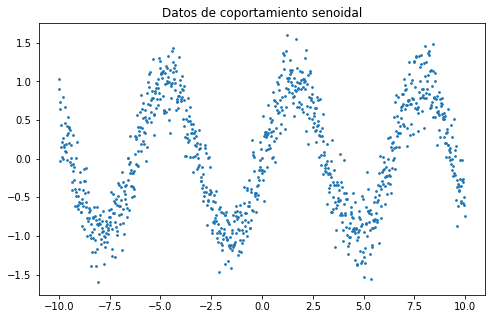

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(8, 5), facecolor='white')
ax.scatter(X_or, y_or, s=3)
ax.set_title('Datos de coportamiento senoidal')
plt.show()

In [ ]:
model_0 = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=200),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(in_features=200, out_features=1)
)

In [ ]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001, momentum=0)
criterion = torch.nn.MSELoss()

In [ ]:
#Carga en CUDA


In [ ]:
epochs = 1000
for epo in range(epochs):
  optimizer.zero_grad()
  y_pred = model_0(X_or)     #y predicho
  loss = criterion(y_pred, y_or)   #perdida
  loss.backward()
  optimizer.step()
  if epo % 100 == 0:
    print(epo, loss.item())

0 0.4020823538303375
100 0.399064302444458
200 0.39607155323028564
300 0.3931093215942383
400 0.3901785910129547
500 0.3872745633125305
600 0.3843955099582672
700 0.38154661655426025
800 0.3787310719490051
900 0.37595194578170776


In [ ]:
X_np = X_or.numpy()
y_np = y_or.numpy()
y_pred_np = y_pred.data.numpy()

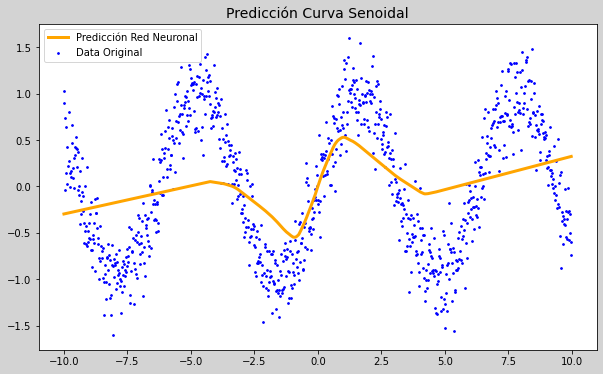

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='lightgray')
ax.scatter(X_or, y_or, s=3, c='blue', label='Data Original')
ax.plot(X_np, y_pred_np, c='orange', lw=3, label='Predicción Red Neuronal')
#ax.plot(X_or, torch.sin(X_or), c='black', lw=10, alpha=0.3, label='Función Matemática')
plt.legend(loc='best')
plt.title('Predicción Curva Senoidal', fontsize=14)
plt.show()